# Predict Customer Churn
* start date: 20.06.24

> 고객 데이터에 관심이 많다. 특히 고객 이탈에 대해 공부를 해보고 싶었는데, Kaggle에 공개된 데이터셋이 존재했다.
* 데이터셋: [캐글 데이터셋](https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction)

# About project (TMI)
![image](https://nextommerce.com/wp-content/uploads/2019/04/pasted-image-0-1024x513.png)
* 서비스에서 가장 중요한 것이 뭐냐고 묻는다면 나는 고객이라고 답할것이다. 고객이 없다면 서비스의 존재 이유가 사라지기 때문이다.
    * 고객은 다음과 같이 크게 세 분류로 나눌 수 있을것이다.
        1. 신규 고객: 브랜드 경험과 이해도가 적다. 애정 또한 낮다.
        2. 충성 고객: 브랜드에 긍정적인 경험을 가지고있고, 서비스를 꾸준히 이용한다.
        3. **이탈 고객**: 우리 서비스를 이용했었지만 이제 떠난 고객이다. 이탈을 영어로는 churn 이라고 한다.
    * 서비스를 성공시키기 위해서는, 1) 신규 고객을 2) 충성 고객으로 만드는 것이 중요하다.
    * 또한 **3) 이탈 고객이 되지 않도록 방지하는 것** 또한 매우 중요하다. (이번 프로젝트는 이 요소에 중점을 둔다.)
* e-커머스에서 이탈 고객 방지 프로젝트를 해보며 느낀 점은,
    1. 이탈할 것이라고 **예상**되는 고객 리스트가 있다면, 
    2. 그들이 이탈하지 않도록 방지할 수 있고,
    3. 서비스를 더 성장시킬 수 있겠다는 것이다.
- - -
* 머신러닝을 공부하다보니 과거에 **예측**하지 못했던 부분들을 머신러닝 모델을 통해 가능하겠다는 생각이 들었다. (분류 문제로)
    * 실제로 이탈 고객을 예측하는 모델을 만들어보기 위해 데이터를 찾다가
    * 캐글에서 churn 여부가 기재된 고객 데이터를 찾게 되었다.
* 이탈 예정인 고객을 분류하는 모델을 실제로 만들어보자.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-불러오기" data-toc-modified-id="1.-데이터-불러오기-1">1. 데이터 불러오기</a></span></li><li><span><a href="#2.-데이터-전처리" data-toc-modified-id="2.-데이터-전처리-2">2. 데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#2.1-컬럼명-변경" data-toc-modified-id="2.1-컬럼명-변경-2.1">2.1 컬럼명 변경</a></span></li><li><span><a href="#2.2-이진-텍스트-데이터-숫자로-변경" data-toc-modified-id="2.2-이진-텍스트-데이터-숫자로-변경-2.2">2.2 이진 텍스트 데이터 숫자로 변경</a></span></li><li><span><a href="#2.3-Totalcharges-컬럼" data-toc-modified-id="2.3-Totalcharges-컬럼-2.3">2.3 Totalcharges 컬럼</a></span></li></ul></li><li><span><a href="#3.-데이터-살펴보기" data-toc-modified-id="3.-데이터-살펴보기-3">3. 데이터 살펴보기</a></span><ul class="toc-item"><li><span><a href="#3.1-Churn" data-toc-modified-id="3.1-Churn-3.1">3.1 Churn</a></span></li><li><span><a href="#3.2-Gender" data-toc-modified-id="3.2-Gender-3.2">3.2 Gender</a></span></li><li><span><a href="#3.3-Demographic" data-toc-modified-id="3.3-Demographic-3.3">3.3 Demographic</a></span></li><li><span><a href="#3.4-Tenure" data-toc-modified-id="3.4-Tenure-3.4">3.4 Tenure</a></span></li><li><span><a href="#3.5-Services-&amp;-contracts" data-toc-modified-id="3.5-Services-&amp;-contracts-3.5">3.5 Services &amp; contracts</a></span></li><li><span><a href="#3.6-Charges" data-toc-modified-id="3.6-Charges-3.6">3.6 Charges</a></span></li><li><span><a href="#3.7-Correlation" data-toc-modified-id="3.7-Correlation-3.7">3.7 Correlation</a></span></li></ul></li><li><span><a href="#4.-Feature-Engineering" data-toc-modified-id="4.-Feature-Engineering-4">4. Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#4.1-Scaling" data-toc-modified-id="4.1-Scaling-4.1">4.1 Scaling</a></span></li><li><span><a href="#4.2-One_hot_encoding" data-toc-modified-id="4.2-One_hot_encoding-4.2">4.2 One_hot_encoding</a></span></li></ul></li><li><span><a href="#5.-Modeling" data-toc-modified-id="5.-Modeling-5">5. Modeling</a></span><ul class="toc-item"><li><span><a href="#5.1-측정-지표" data-toc-modified-id="5.1-측정-지표-5.1">5.1 측정 지표</a></span></li><li><span><a href="#5.2-Baseline" data-toc-modified-id="5.2-Baseline-5.2">5.2 Baseline</a></span></li><li><span><a href="#5.3-Feature-Selection" data-toc-modified-id="5.3-Feature-Selection-5.3">5.3 Feature Selection</a></span></li><li><span><a href="#5.4-Class_wight,-C" data-toc-modified-id="5.4-Class_wight,-C-5.4">5.4 Class_wight, C</a></span></li><li><span><a href="#5.5-GridSearch" data-toc-modified-id="5.5-GridSearch-5.5">5.5 GridSearch</a></span></li></ul></li><li><span><a href="#6.-비즈니스에-적용해본다면?" data-toc-modified-id="6.-비즈니스에-적용해본다면?-6">6. 비즈니스에 적용해본다면?</a></span><ul class="toc-item"><li><span><a href="#6.1-현업에선.." data-toc-modified-id="6.1-현업에선..-6.1">6.1 현업에선..</a></span></li></ul></li></ul></div>

## 1. 데이터 불러오기

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 30)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import missingno as msno
from tqdm import tqdm_notebook

In [2]:
plt.rc('font', size=13)
plt.rc('font', family='NanumGothic')

In [3]:
df = pd.read_csv('source/Telco_Customer/Telco_Customer_Churn.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [7]:
df.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


* object 형식의 컬럼이 많은데, 대부분 No, Yes 형식의 binary text가 많다.
    * 이 컬럼들은 전처리 시 [0, 1]로 변경하자.
* 그리고, 컬럼명이 어떤 것은 카멜표기법이고, 어떤것은 그냥 소문자 표기법이다.
    * 오타도 줄일 겸, 모두 소문자로 컬럼명을 변경해버리자.

## 2. 데이터 전처리

### 2.1 컬럼명 변경
* 소문자로 변경하자

In [8]:
col_lower = [col.lower() for col in df.columns]
col_lower

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [9]:
df.columns = col_lower
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

### 2.2 이진 텍스트 데이터 숫자로 변경

In [10]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
cols = ['partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup',
        'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 
        'paperlessbilling', 'churn']
for col in cols:
    print('{:<17}: {}'.format(col, df[col].unique()))

partner          : ['Yes' 'No']
dependents       : ['No' 'Yes']
phoneservice     : ['No' 'Yes']
multiplelines    : ['No phone service' 'No' 'Yes']
onlinesecurity   : ['No' 'Yes' 'No internet service']
onlinebackup     : ['Yes' 'No' 'No internet service']
deviceprotection : ['No' 'Yes' 'No internet service']
techsupport      : ['No' 'Yes' 'No internet service']
streamingtv      : ['No' 'Yes' 'No internet service']
streamingmovies  : ['No' 'Yes' 'No internet service']
paperlessbilling : ['Yes' 'No']
churn            : ['No' 'Yes']


* ['No' 'Yes' 'No internet service']는 ['No', 'Yes']로 변경해주고,
* No: 0과 Yes: 1로 변경해주자

In [12]:
for col in cols:
    df[col].replace({'No': 0,
                     'No internet service': 0,
                     'No phone service': 0,
                     'Yes': 1}, inplace=True)

In [13]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerid          7043 non-null object
gender              7043 non-null object
seniorcitizen       7043 non-null int64
partner             7043 non-null int64
dependents          7043 non-null int64
tenure              7043 non-null int64
phoneservice        7043 non-null int64
multiplelines       7043 non-null int64
internetservice     7043 non-null object
onlinesecurity      7043 non-null int64
onlinebackup        7043 non-null int64
deviceprotection    7043 non-null int64
techsupport         7043 non-null int64
streamingtv         7043 non-null int64
streamingmovies     7043 non-null int64
contract            7043 non-null object
paperlessbilling    7043 non-null int64
paymentmethod       7043 non-null object
monthlycharges      7043 non-null float64
totalcharges        7043 non-null object
churn               7043 non-null int64
dtypes: float64(1), int64(14), object(6)
memo

### 2.3 Totalcharges 컬럼
* 해당 컬럼이 object로 되어있는 것을 보아, 컬럼 내 문자가 포함되어있나보다.

In [15]:
df.totalcharges.value_counts().sort_index()[:5]

          11
100.2      1
100.25     1
100.35     1
100.4      1
Name: totalcharges, dtype: int64

* 공백문자가 껴있다. 해당 레코드를 확인해보자.

In [16]:
df[df.totalcharges==' ']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,1,1,0,0,0,DSL,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,0,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,1,1,0,1,0,DSL,1,1,1,0,1,1,Two year,0,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,1,1,0,0,0,DSL,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,,0
3331,7644-OMVMY,Male,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,1,1,0,1,0,No,0,0,0,0,0,0,One year,1,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,1,1,0,1,1,DSL,0,1,1,1,1,0,Two year,0,Mailed check,73.35,,0


* 총 11개로 적기때문에, 해당 레코드들은 삭제해주자.

In [17]:
df = df[df['totalcharges'] != ' ']
df.totalcharges = df.totalcharges.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerid          7032 non-null object
gender              7032 non-null object
seniorcitizen       7032 non-null int64
partner             7032 non-null int64
dependents          7032 non-null int64
tenure              7032 non-null int64
phoneservice        7032 non-null int64
multiplelines       7032 non-null int64
internetservice     7032 non-null object
onlinesecurity      7032 non-null int64
onlinebackup        7032 non-null int64
deviceprotection    7032 non-null int64
techsupport         7032 non-null int64
streamingtv         7032 non-null int64
streamingmovies     7032 non-null int64
contract            7032 non-null object
paperlessbilling    7032 non-null int64
paymentmethod       7032 non-null object
monthlycharges      7032 non-null float64
totalcharges        7032 non-null float64
churn               7032 non-null int64
dtypes: float64(2), int64(14), object(5)
mem

* 처리 완료!

## 3. 데이터 살펴보기
* EDA전에, test 세트는 미리 구분하여 들여다보지 않기

In [18]:
df_train, df_test = train_test_split(df)

In [19]:
print(df_train.shape, df_test.shape)

(5274, 21) (1758, 21)


In [20]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4101,9780-FKVVF,Male,0,0,0,6,1,0,DSL,1,0,0,0,0,1,Month-to-month,1,Bank transfer (automatic),59.15,336.70,0
3489,0975-UYDTX,Female,0,1,0,26,1,1,DSL,1,1,1,1,1,1,One year,1,Credit card (automatic),90.10,2312.55,0
4219,5176-LDKUH,Female,0,0,0,48,1,0,Fiber optic,0,1,0,0,0,0,One year,0,Electronic check,75.15,3772.65,0
5091,2606-RMDHZ,Male,0,0,0,6,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Credit card (automatic),30.50,208.70,1
5398,3936-QQFLL,Male,0,0,0,2,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,19.75,39.30,0


### 3.1 Churn

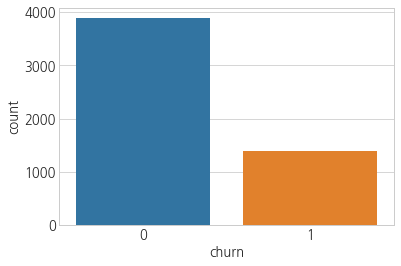

In [183]:
sns.countplot(df_train.churn)

In [184]:
df_train.churn.mean()

0.26355707243079257

### 3.2 Gender

Male ratio: 50.32%, Female ratio: 49.68%


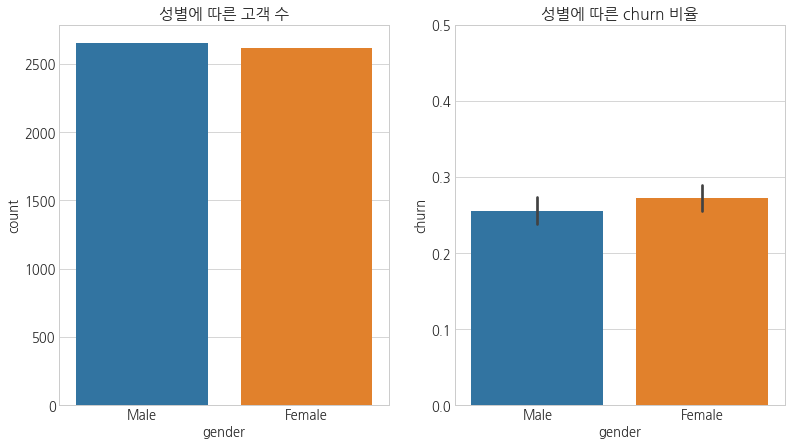

In [21]:
df_male = df_train[df_train.gender=='Male']
df_female = df_train[df_train.gender=='Female']

f, ax = plt.subplots(1, 2, figsize=(13, 7))
sns.countplot(df_train.gender, ax=ax[0])
ax[0].set_title('성별에 따른 고객 수')
sns.barplot('gender', 'churn', data=df_train, ax=ax[1])
ax[1].set_title('성별에 따른 churn 비율')
ax[1].set_ylim(0, 0.5)
print('Male ratio: {:.2f}%, Female ratio: {:.2f}%'.format(len(df_male) / len(df_train)*100,
                                                          len(df_female) / len(df_train)*100))

* 데이터셋 내 성비는 밸런스가 잘 맞는다.
    * 성별에 따라 churn 비율의 차이는 또한 적다.

### 3.3 Demographic
* seniorcitizen, partner, dependents	

In [22]:
def cplot(data, col, ax):
    sns.countplot(data[col], ax=ax)
    ax.set_title('{} ({:.2f}%)'.format(col, data[col].mean()*100))

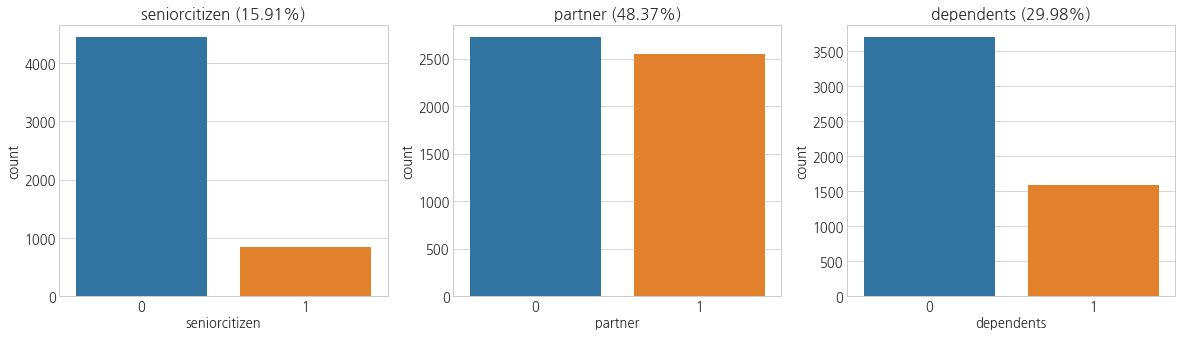

In [23]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))
cplot(df_train, 'seniorcitizen', ax[0])
cplot(df_train, 'partner', ax[1])
cplot(df_train, 'dependents', ax[2])

* 시니어의 비율은 약 16%를 차지하고,
* 배우자가 있는 사람은 48%,
* 자식이 있는 곳은 30%를 차지한다.
* 이제 여기에 churn을 함께 살펴보자.

In [24]:
def churnplot(data, col, ax):
    sns.countplot(col, hue='churn', data=data, ax=ax)
    ax.set_title('{} (0: {:.2f}%, 1: {:.2f}%)'.format(
    col,
    data[data[col] == 0].churn.mean()*100, 
    data[data[col] == 1].churn.mean()*100))

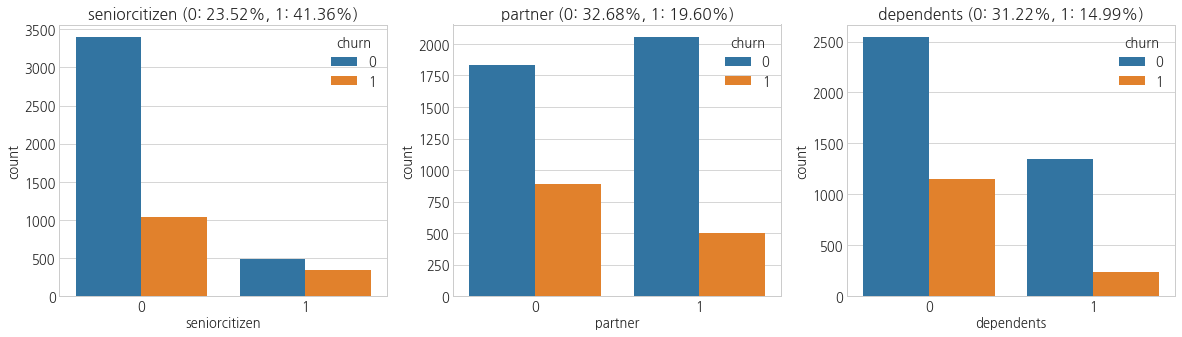

In [25]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))
churnplot(df_train, 'seniorcitizen', ax[0])
churnplot(df_train, 'partner', ax[1])
churnplot(df_train, 'dependents', ax[2])

* 시니어일 경우, churn rate가 높다.
* 배우자나 자식이 있는 경우에는 churn rate가 상대적으로 낮다.

### 3.4 Tenure
* 계약 기간과 chunrate간의 관계를 파악해보자.

In [26]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4101,9780-FKVVF,Male,0,0,0,6,1,0,DSL,1,0,0,0,0,1,Month-to-month,1,Bank transfer (automatic),59.15,336.70,0
3489,0975-UYDTX,Female,0,1,0,26,1,1,DSL,1,1,1,1,1,1,One year,1,Credit card (automatic),90.10,2312.55,0
4219,5176-LDKUH,Female,0,0,0,48,1,0,Fiber optic,0,1,0,0,0,0,One year,0,Electronic check,75.15,3772.65,0
5091,2606-RMDHZ,Male,0,0,0,6,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Credit card (automatic),30.50,208.70,1
5398,3936-QQFLL,Male,0,0,0,2,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,19.75,39.30,0


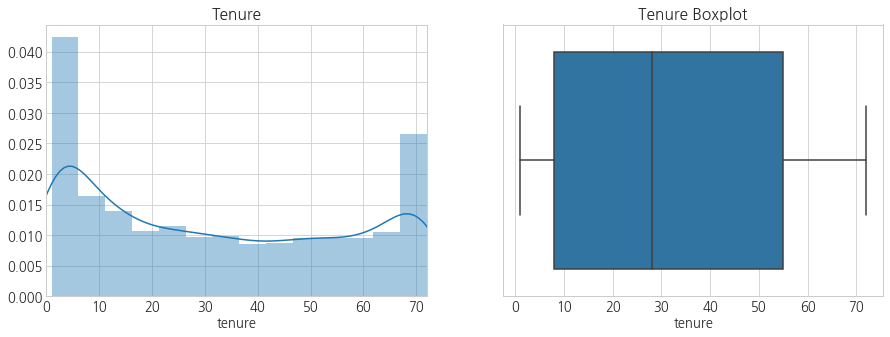

In [27]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df_train.tenure, ax=ax[0])
ax[0].set_title('Tenure')
ax[0].set_xlim(0, max(df_train.tenure))

sns.boxplot(df_train.tenure, ax=ax[1])
ax[1].set_title('Tenure Boxplot')
plt.show()

* 쌍봉우리 형태를 보인다. 
* churn 유무로 나눠 살펴보자.

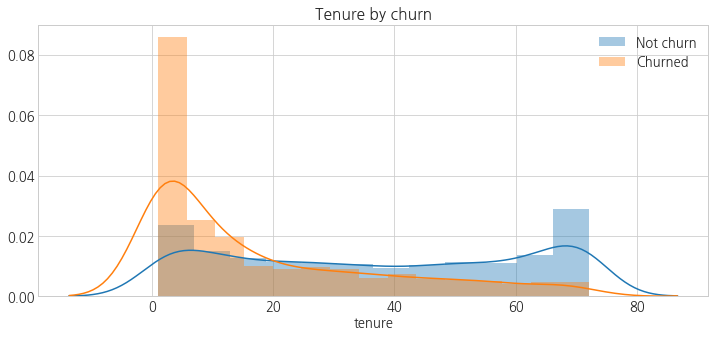

In [28]:
plt.figure(figsize=(12, 5))
sns.distplot(df_train[df_train.churn==0].tenure, label='Not churn')
sns.distplot(df_train[df_train.churn==1].tenure, label='Churned')
plt.legend()
plt.title('Tenure by churn')
plt.show()

* 이탈 고객의 경우 계약 기간이 짧은 것을 확인할 수 있다.

### 3.5 Services & contracts
* phoneservice, multiplelines, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, paperlessbilling, contract(cat), internetservice(cat)

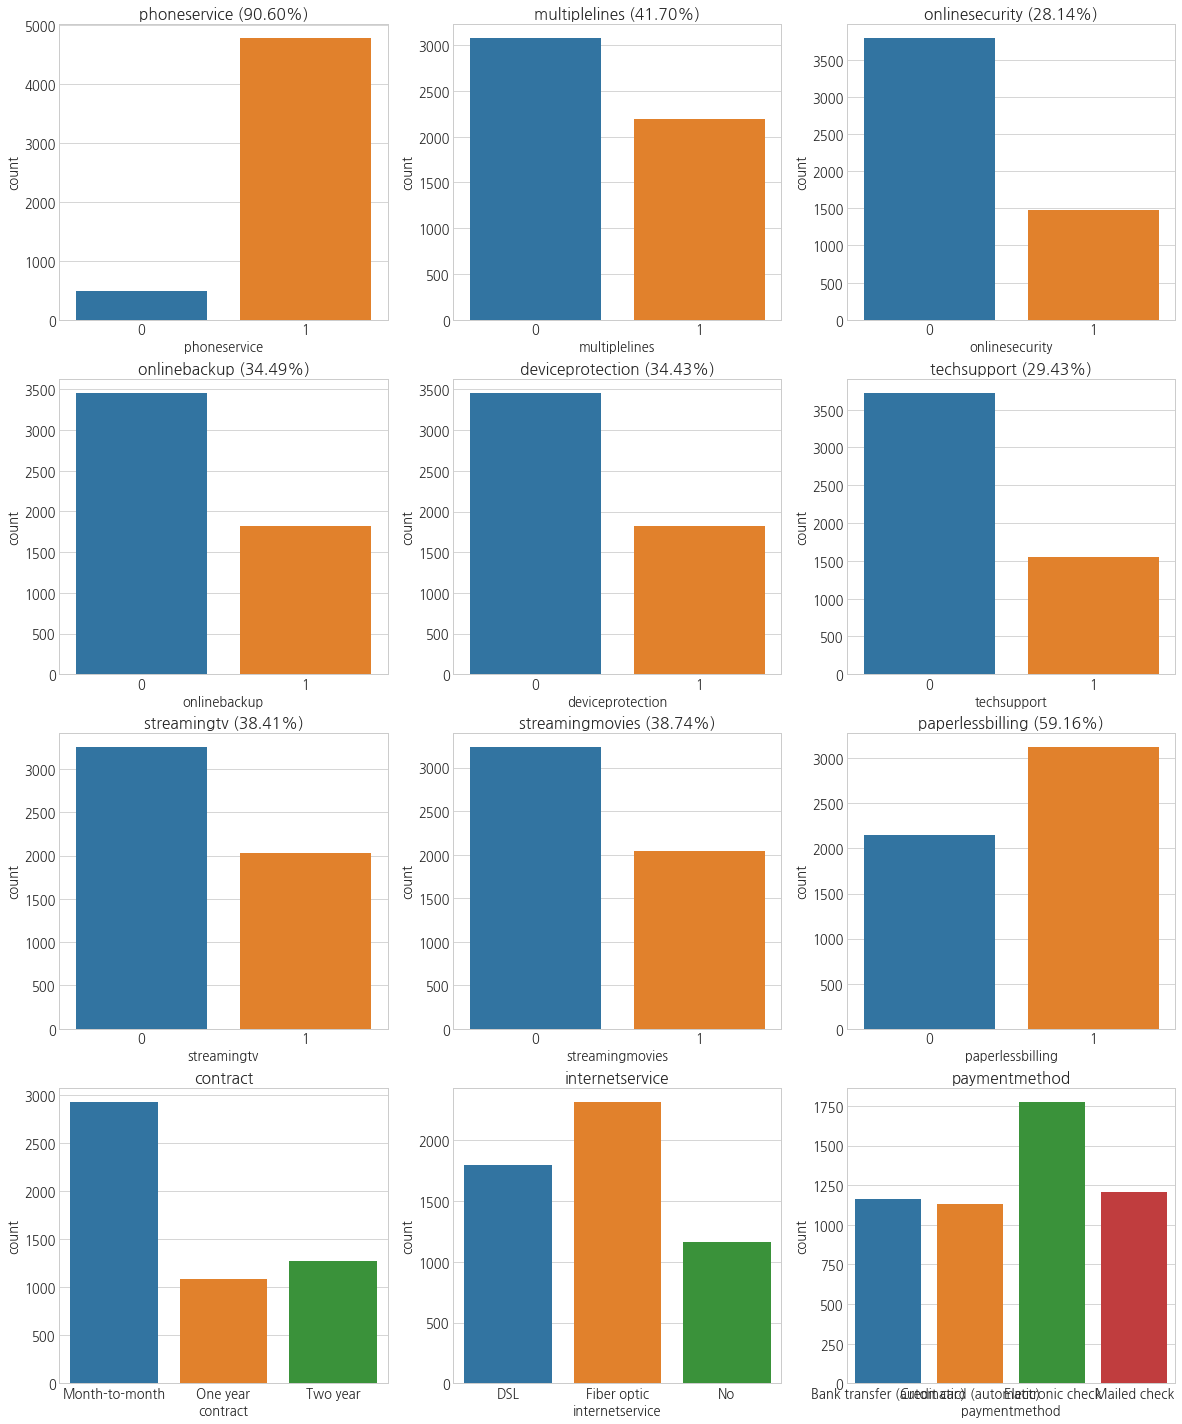

In [29]:
f, ax = plt.subplots(4, 3, figsize=(20, 25))
cplot(df_train, 'phoneservice', ax=ax[0,0])
cplot(df_train, 'multiplelines', ax=ax[0,1])
cplot(df_train, 'onlinesecurity', ax=ax[0,2])
cplot(df_train, 'onlinebackup', ax=ax[1,0])
cplot(df_train, 'deviceprotection', ax=ax[1,1])
cplot(df_train, 'techsupport', ax=ax[1,2])
cplot(df_train, 'streamingtv', ax=ax[2,0])
cplot(df_train, 'streamingmovies', ax=ax[2,1])
cplot(df_train, 'paperlessbilling', ax=ax[2,2])
sns.countplot('contract', data=df_train, ax=ax[3,0])
ax[3, 0].set_title('contract')
sns.countplot('internetservice', data=df_train, ax=ax[3,1])
ax[3, 1].set_title('internetservice')
sns.countplot('paymentmethod', data=df_train, ax=ax[3,2])
ax[3, 2].set_title('paymentmethod')

plt.show()

* 폰서비스를 사용하는 고객이 90% 이상이고, 그 외 서비스를 이용하는 고객들의 현황을 확인할 수 있다.
* 계약은 월별로 하는 고객이 가장 많았다.

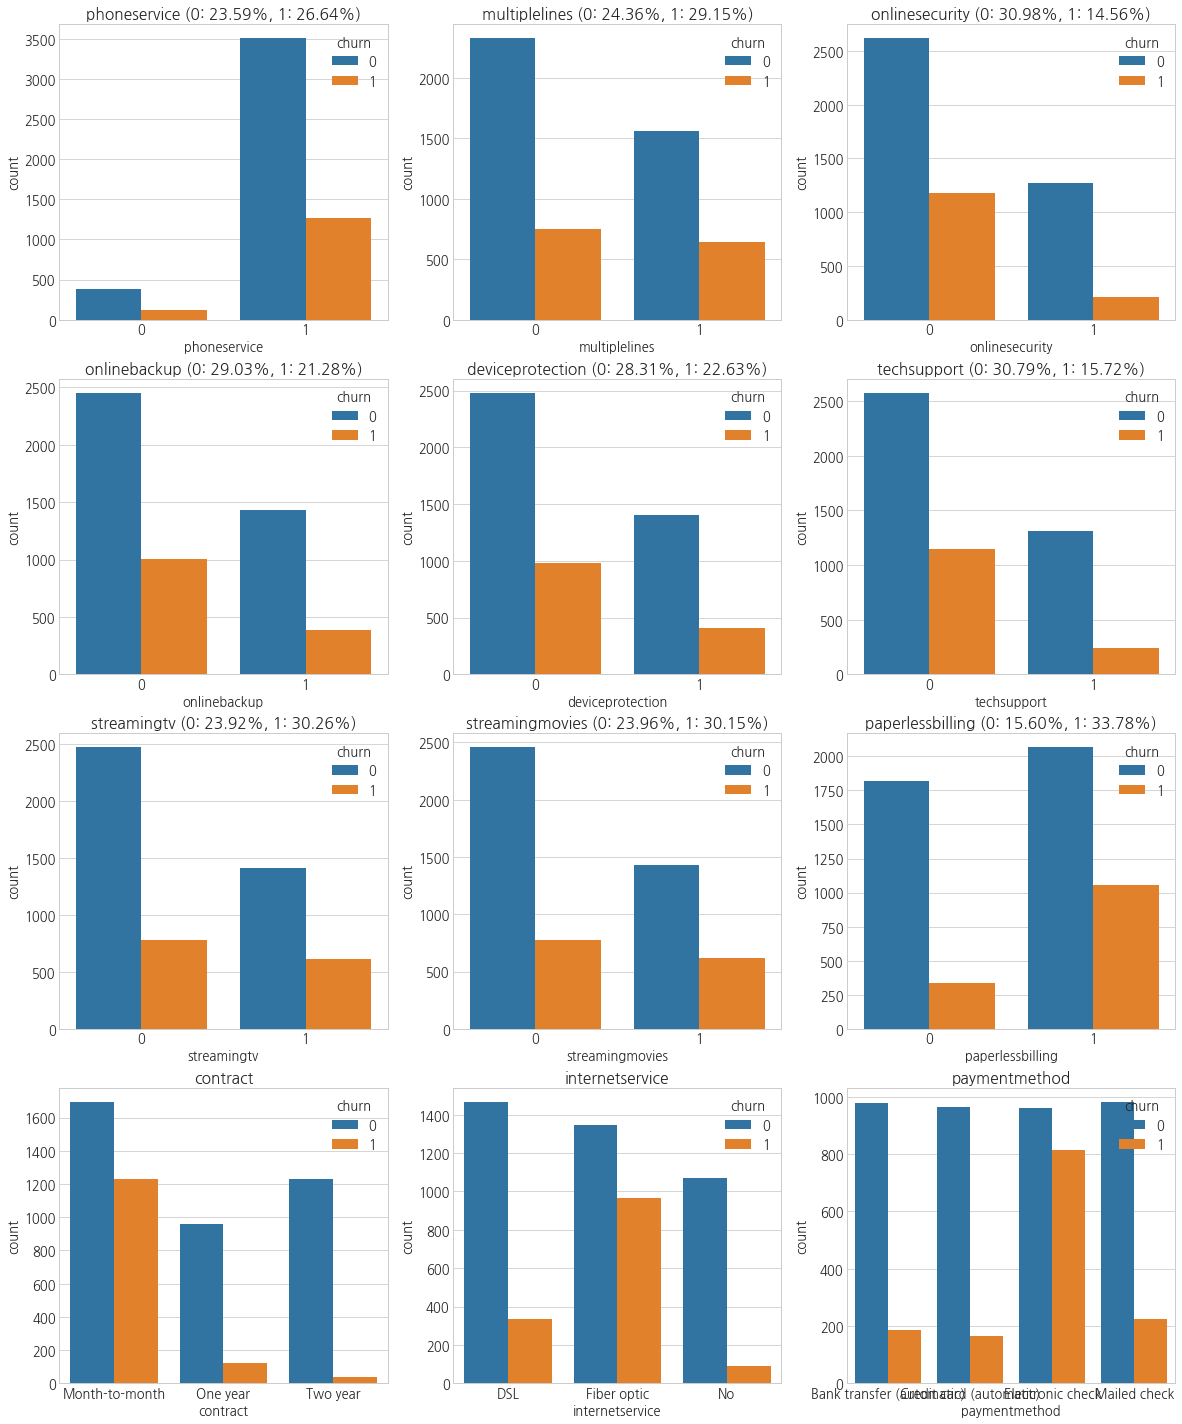

In [30]:
f, ax = plt.subplots(4, 3, figsize=(20, 25))
churnplot(df_train, 'phoneservice', ax=ax[0,0])
churnplot(df_train, 'multiplelines', ax=ax[0,1])
churnplot(df_train, 'onlinesecurity', ax=ax[0,2])
churnplot(df_train, 'onlinebackup', ax=ax[1,0])
churnplot(df_train, 'deviceprotection', ax=ax[1,1])
churnplot(df_train, 'techsupport', ax=ax[1,2])
churnplot(df_train, 'streamingtv', ax=ax[2,0])
churnplot(df_train, 'streamingmovies', ax=ax[2,1])
churnplot(df_train, 'paperlessbilling', ax=ax[2,2])
sns.countplot('contract', hue='churn', data=df_train, ax=ax[3,0])
ax[3, 0].set_title('contract')
sns.countplot('internetservice', hue='churn', data=df_train, ax=ax[3,1])
ax[3, 1].set_title('internetservice')
sns.countplot('paymentmethod', hue='churn', data=df_train, ax=ax[3,2])
ax[3, 2].set_title('paymentmethod')
plt.show()

* 특이한 점은, 통지서 없이 이용하는 고객의 churnrate가 높았다.
* 그리고 월별 계약자가 가장 많았는데, churnrate 또한 세 지불 형태 중 가장 높았다.
* paperlessbilling의 평균 차가 실제로 유의미한것인지 궁금한데, ttest를 통해 검증해보자.


In [31]:
from scipy import stats
lresult = stats.levene(df_train[df_train.paperlessbilling==0].churn, 
                       df_train[df_train.paperlessbilling==1].churn)
print('F: {:.3f}\np-value: {:.3f}'.format(lresult[0], lresult[1]))

F: 226.294
p-value: 0.000


* p값이 0.00미만으로 등분산성을 만족하지 않는다.

In [32]:
tresult = stats.ttest_ind(df_train[df_train.paperlessbilling == 0].churn,
                          df_train[df_train.paperlessbilling == 1].churn,
                          equal_var=False)
print('t: {:.3f}\np-value: {:.3f}'.format(tresult[0], tresult[1]))

t: -15.774
p-value: 0.000


* 두 평균 사이에 유의미한 차이가 있다는 것을 알 수 있다.

### 3.6 Charges
* monthlycharges, totalcharges
* 비용의 분포를 살펴보고,
* churn에 따른 비용 변화와
* 계약을 한 지 오래됐을수록 비용이 어떻게 변화하는지 함께 살펴보자.

In [33]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4101,9780-FKVVF,Male,0,0,0,6,1,0,DSL,1,0,0,0,0,1,Month-to-month,1,Bank transfer (automatic),59.15,336.70,0
3489,0975-UYDTX,Female,0,1,0,26,1,1,DSL,1,1,1,1,1,1,One year,1,Credit card (automatic),90.10,2312.55,0
4219,5176-LDKUH,Female,0,0,0,48,1,0,Fiber optic,0,1,0,0,0,0,One year,0,Electronic check,75.15,3772.65,0
5091,2606-RMDHZ,Male,0,0,0,6,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Credit card (automatic),30.50,208.70,1
5398,3936-QQFLL,Male,0,0,0,2,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,19.75,39.30,0


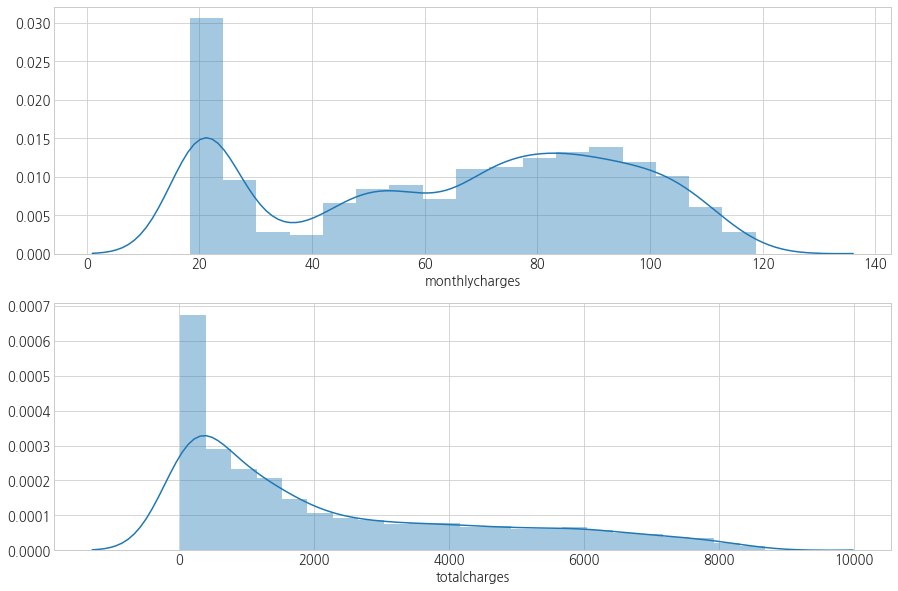

In [34]:
f, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.distplot(df_train.monthlycharges, ax=ax[0])
sns.distplot(df_train.totalcharges, ax=ax[1])
plt.show()

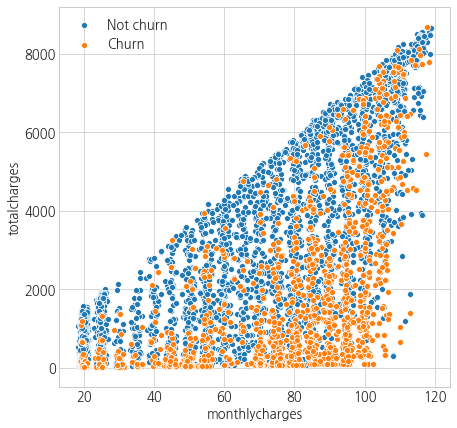

In [35]:
plt.figure(figsize=(7, 7))
sns.scatterplot(df_train[df_train.churn == 0].monthlycharges,
                df_train[df_train.churn == 0].totalcharges,
                label='Not churn')
sns.scatterplot(df_train[df_train.churn == 1].monthlycharges,
                df_train[df_train.churn == 1].totalcharges,
                label='Churn')
plt.show()

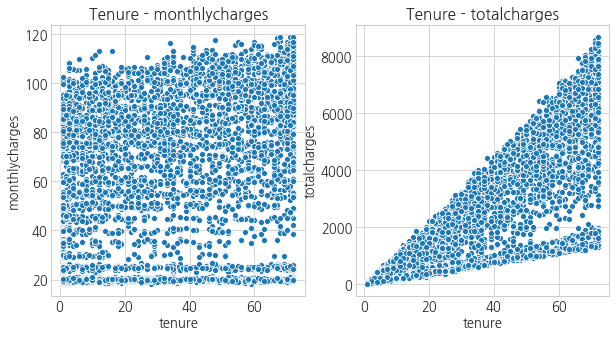

In [36]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(df_train.tenure, df_train.monthlycharges, ax=ax[0])
ax[0].set_title('Tenure - monthlycharges')
sns.scatterplot(df_train.tenure, df_train.totalcharges, ax=ax[1])
ax[1].set_title('Tenure - totalcharges')
plt.show()

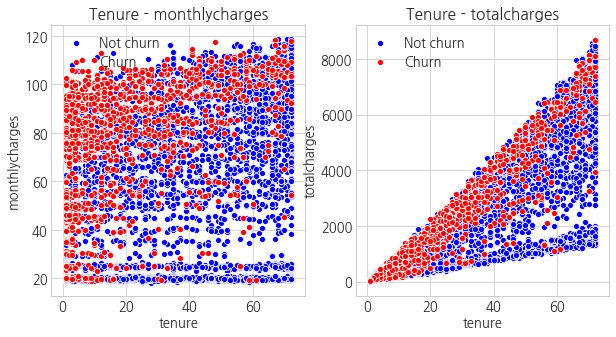

In [37]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(df_train[df_train.churn == 0].tenure,
                df_train[df_train.churn == 0].monthlycharges, ax=ax[0],
                color='b', label='Not churn')
sns.scatterplot(df_train[df_train.churn == 1].tenure,
                df_train[df_train.churn == 1].monthlycharges, ax=ax[0],
                color='r', label='Churn')
ax[0].set_title('Tenure - monthlycharges')
sns.scatterplot(df_train[df_train.churn == 0].tenure,
                df_train[df_train.churn == 0].totalcharges, ax=ax[1],
                color='b', label='Not churn')
sns.scatterplot(df_train[df_train.churn == 1].tenure,
                df_train[df_train.churn == 1].totalcharges, ax=ax[1],
                color='r', label='Churn')
ax[1].set_title('Tenure - totalcharges')
plt.show()

* 계약 기간이 길 수록 전체 요금은 증가한다. 당연한 결과다.
* 근데, 계약 기간이 길면 각종 혜택으로 인해 월 비용이 적을 줄 알았는데, 딱히 선형관계를 보이고있지는 않다.

In [38]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4101,9780-FKVVF,Male,0,0,0,6,1,0,DSL,1,0,0,0,0,1,Month-to-month,1,Bank transfer (automatic),59.15,336.70,0
3489,0975-UYDTX,Female,0,1,0,26,1,1,DSL,1,1,1,1,1,1,One year,1,Credit card (automatic),90.10,2312.55,0
4219,5176-LDKUH,Female,0,0,0,48,1,0,Fiber optic,0,1,0,0,0,0,One year,0,Electronic check,75.15,3772.65,0
5091,2606-RMDHZ,Male,0,0,0,6,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Credit card (automatic),30.50,208.70,1
5398,3936-QQFLL,Male,0,0,0,2,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,19.75,39.30,0


### 3.7 Correlation
* 각 컬럼간 상관 관계를 살펴보자.

In [39]:
df_train.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4101,9780-FKVVF,Male,0,0,0,6,1,0,DSL,1,0,0,0,0,1,Month-to-month,1,Bank transfer (automatic),59.15,336.70,0
3489,0975-UYDTX,Female,0,1,0,26,1,1,DSL,1,1,1,1,1,1,One year,1,Credit card (automatic),90.10,2312.55,0


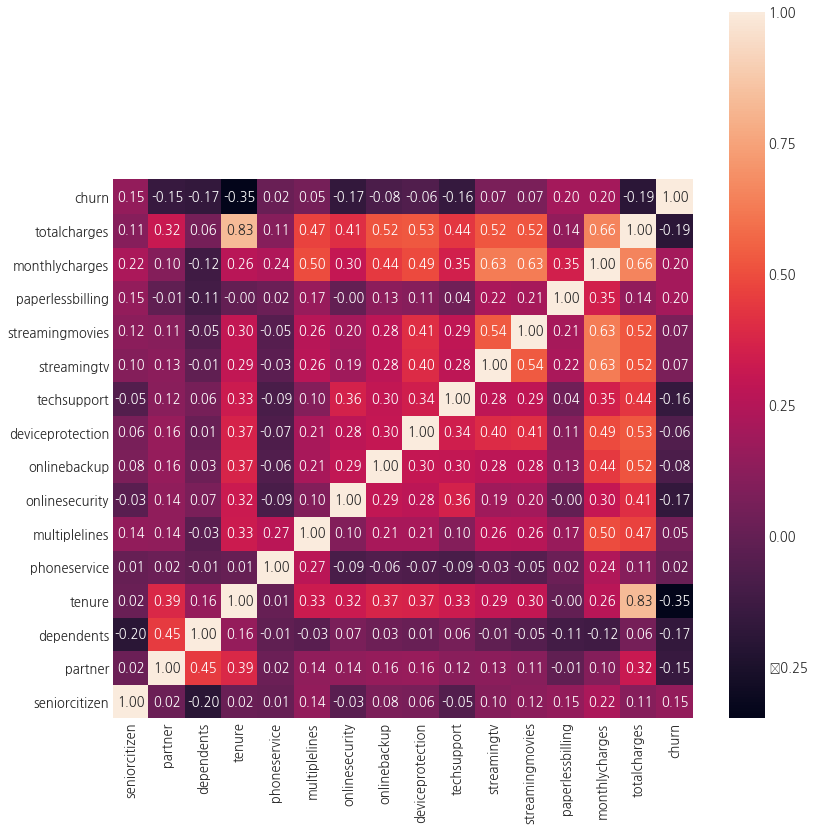

In [40]:
plt.figure(figsize=(13, 13))
sns.heatmap(df_train.corr(), annot=True, fmt='.2f')
plt.ylim([0,21])
plt.show()

* 통신사 서비스들(streamingmovies ~ multiplelines)이 비용과 양의 상관관계가 있다.
    * 또한, 서비스 이용 유무는 기간(tenure)과도 양의 상관관계를 보인다.
* 배우자 여부와 계약 기간이 양의 상관관계가 있다.
* 기간(tenure)과 churn 간 음의 상관관계가 존재한다.

## 4. Feature Engineering
* 일단 totalcharges와 monthlycharges, tenure를 스케일링해주자.
* 그 후 범주형 데이터를 원핫인코딩하자.

### 4.1 Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[['tenure', 'monthlycharges', 'totalcharges']] =\
scaler.fit_transform(df_train[['tenure', 'monthlycharges', 'totalcharges']])

In [42]:
df_test[['tenure', 'monthlycharges', 'totalcharges']] =\
scaler.transform(df_test[['tenure', 'monthlycharges', 'totalcharges']])

In [43]:
df_train.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4101,9780-FKVVF,Male,0,0,0,-1.063702,1,0,DSL,1,0,0,0,0,1,Month-to-month,1,Bank transfer (automatic),-0.183383,-0.850824,0
3489,0975-UYDTX,Female,0,1,0,-0.249401,1,1,DSL,1,1,1,1,1,1,One year,1,Credit card (automatic),0.841167,0.017097,0
4219,5176-LDKUH,Female,0,0,0,0.646330,1,0,Fiber optic,0,1,0,0,0,0,One year,0,Electronic check,0.346271,0.658466,0


### 4.2 One_hot_encoding
* 모델링을 위해 원핫인코딩을 진행하자.

In [44]:
df_train_dummy = pd.get_dummies(df_train.drop('customerid', axis=1))
df_test_dummy = pd.get_dummies(df_test.drop('customerid', axis=1))

In [45]:
df_train_dummy.head(2)

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,gender_Female,gender_Male,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
4101,0,0,0,-1.063702,1,0,1,0,0,0,0,1,1,-0.183383,-0.850824,0,0,1,1,0,0,1,0,0,1,0,0,0
3489,0,1,0,-0.249401,1,1,1,1,1,1,1,1,1,0.841167,0.017097,0,1,0,1,0,0,0,1,0,0,1,0,0


In [46]:
print(df_train_dummy.shape, df_test_dummy.shape)

(5274, 28) (1758, 28)


In [47]:
df_train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 4101 to 6632
Data columns (total 28 columns):
seniorcitizen                              5274 non-null int64
partner                                    5274 non-null int64
dependents                                 5274 non-null int64
tenure                                     5274 non-null float64
phoneservice                               5274 non-null int64
multiplelines                              5274 non-null int64
onlinesecurity                             5274 non-null int64
onlinebackup                               5274 non-null int64
deviceprotection                           5274 non-null int64
techsupport                                5274 non-null int64
streamingtv                                5274 non-null int64
streamingmovies                            5274 non-null int64
paperlessbilling                           5274 non-null int64
monthlycharges                             5274 non-null float64
tota

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 6174 to 5663
Data columns (total 21 columns):
customerid          1758 non-null object
gender              1758 non-null object
seniorcitizen       1758 non-null int64
partner             1758 non-null int64
dependents          1758 non-null int64
tenure              1758 non-null float64
phoneservice        1758 non-null int64
multiplelines       1758 non-null int64
internetservice     1758 non-null object
onlinesecurity      1758 non-null int64
onlinebackup        1758 non-null int64
deviceprotection    1758 non-null int64
techsupport         1758 non-null int64
streamingtv         1758 non-null int64
streamingmovies     1758 non-null int64
contract            1758 non-null object
paperlessbilling    1758 non-null int64
paymentmethod       1758 non-null object
monthlycharges      1758 non-null float64
totalcharges        1758 non-null float64
churn               1758 non-null int64
dtypes: float64(3), int64(13), object(5

## 5. Modeling
* 많은 모델들을 시도해볼 수 있겠지만, 데이터가 적고, 피처도 많은 편은 아니다.
* 또한, 이탈 고객 관련 업무는 마케팅팀, 전략팀 등과 커뮤니케이션 해야 할 일이 많을것이므로,
    * Tree나 Randomforest 등 보다 비교적 설명하기 쉬운 LogisticRegressor를 사용하여 모델링을 진행해보겠다.

In [49]:
# 데이터 나눠주기
X_train = df_train_dummy.drop(['churn'], axis=1)
X_test = df_test_dummy.drop(['churn'], axis=1)
y_train = df_train_dummy.churn
y_test = df_test_dummy.churn

In [50]:
X_train.head(2)

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,gender_Female,gender_Male,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
4101,0,0,0,-1.063702,1,0,1,0,0,0,0,1,1,-0.183383,-0.850824,0,1,1,0,0,1,0,0,1,0,0,0
3489,0,1,0,-0.249401,1,1,1,1,1,1,1,1,1,0.841167,0.017097,1,0,1,0,0,0,1,0,0,1,0,0


### 5.1 측정 지표
* 측정 지표를 정하기 전에, 목적을 생각해보아야한다.
* 이탈 고객 모델링은, 이탈이라고 예측되어지는 고객에게 마케팅 메시지를 보내어 이탈을 방지하는 것이 목적이다.
* 그러므로, 실제 이탈 고객을 얼마나 많이 찾아내는가가 중요하다.
* 따라서, **재현율(recall), f1score**를 지표로 사용해보겠다.

### 5.2 Baseline
* 튜닝 없이 바로 모델에 넣어서 성능을 확인해보자.

In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
def print_score(y_true, y_pred):
    print('recall: {:.2f}\nprecision: {:.2f}\nf1_score: {:.2f}'.format(
        recall_score(y_true, y_pred), precision_score(y_true, y_pred), f1_score(y_true, y_pred)))
print_score(y_train, y_pred)

recall: 0.55
precision: 0.67
f1_score: 0.61


* 재현율이 55%밖에 되지 않는다. 
* 나머지 45%에 대한 실제값은 잃게되고, 모델의 본 목적을 이루지 못할 수 있다.
* confusion matrix를 나타내보자.

In [288]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[3512,  372],
       [ 621,  769]], dtype=int64)

* Negative에 대해서는 나름 성능이 좋은데, Positive에 대해서는 예측력이 떨어진다.
* test세트에선 어떻게 나타나는지 살펴보자.

In [285]:
y_pred = logreg.predict(X_test)
recall_score(y_test, y_pred)

0.5407098121085595

* 테스트 세트에서도 당연히 좋지 않은 성능을 보이고 있다.
* Feature Selection을 통해 중요도가 낮은 특성을 제외시켜보자.

### 5.3 Feature Selection
* 피처 선택 방법엔 많은 방법이 있지만, RandomForest에서 제공하는 feature_importance_를 통해 진행해보자.

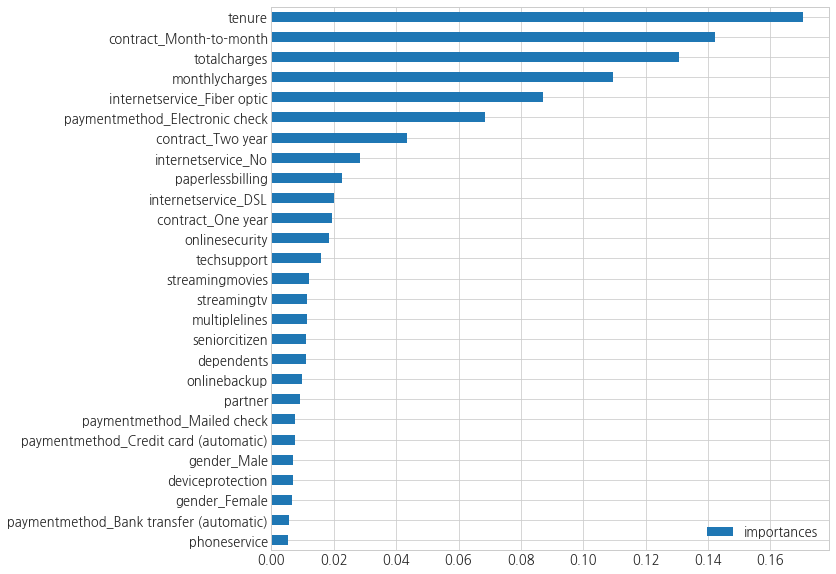

In [228]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=1)
rf.fit(X_train, y_train)
df_fi = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importances'])
df_fi.sort_values('importances', ascending=True, inplace=True)
df_fi.plot(kind='barh', figsize=(10,10))

* 각종 부가 서비스들(phoneservice, onlinebackup, streamingtv 등)의 중요도가 낮다.
* 또한, 성별과 자녀, 배우자 등 인구통계학적 정보들도 중요도가 낮다.
* 0.02 이하인 특성들을 제거해보자.

In [239]:
col_selected = list(df_fi[df_fi.importances>=0.02].index)
col_selected

['internetservice_DSL',
 'paperlessbilling',
 'internetservice_No',
 'contract_Two year',
 'paymentmethod_Electronic check',
 'internetservice_Fiber optic',
 'monthlycharges',
 'totalcharges',
 'contract_Month-to-month',
 'tenure']

* 이제 이 특성들만 남기고 다시 모델링을 진행해보자.

In [290]:
X_train_selected = X_train[col_selected]
X_test_selected = X_test[col_selected]

logreg = LogisticRegression()
logreg.fit(X_train_selected, y_train)
y_pred = logreg.predict(X_train_selected)

print_score(y_train, y_pred)

recall: 0.53
precision: 0.66
f1_score: 0.59


* 불필요한 특성들을 제거하니 오히려 성능이 떨어졌다.
* 이번에는 lable의 가중치와 C값을 변화시켜 성능을 올려보자.

### 5.4 Class_wight, C
* Churn의 0과 1의 비율은 약 7.5:2.5 였다.
* 이를 반영하여 모델에 적용시켜서 성능을 확인해보자.

In [325]:
logreg = LogisticRegression(class_weight={0: 0.25, 1: 0.75})
logreg.fit(X_train_selected, y_train)
y_pred = logreg.predict(X_train_selected)
print_score(y_train, y_pred)
confusion_matrix(y_train, y_pred)

recall: 0.83
precision: 0.50
f1_score: 0.62


array([[2719, 1165],
       [ 238, 1152]], dtype=int64)

* 재현율이 확실히 높아졌다! 하지만 그만큼 정밀도는 전에 비해 하락하였다.
* 이번에는 C값을 조정하여 성능을 올려보자.

In [327]:
logreg = LogisticRegression(C=0.001, class_weight={0: 0.25, 1: 0.75})
logreg.fit(X_train_selected, y_train)
y_pred = logreg.predict(X_train_selected)
print_score(y_train, y_pred)
confusion_matrix(y_train, y_pred)

recall: 0.89
precision: 0.42
f1_score: 0.57


array([[2182, 1702],
       [ 152, 1238]], dtype=int64)

* 모델에 규제를 적용하니, 재현율은 0.89로 높아지나, 정밀도와 f1점수가 낮아진다.

### 5.5 GridSearch
* 그리드서치를 통해 최적의 C, Class_weight 값을 찾아보자.

In [344]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
              'class_weight': [{0: 0.2, 1: 0.8}, {0: 0.25, 1: 0.75},{0: 0.3, 1: 0.7},{0: 0.35, 1: 0.65}]}
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, scoring='f1')
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'class_weight': [{0: 0.2, 1: 0.8}, {0: 0.25, 1: 0.75},
                                          {0: 0.3, 1: 0.7},
                                          {0: 0.35, 1: 0.65}]},
             pre_dispatch='2*n_jobs', refit=True, return_t

In [354]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
15,0.013962,0.000815,0.004322,1.244091e-03,1,"{0: 0.35, 1: 0.65}","{'C': 1, 'class_weight': {0: 0.35, 1: 0.65}}",0.612903,0.667921,0.613746,0.631523,0.025739,1
3,0.017204,0.004256,0.001995,1.410627e-03,1000,"{0: 0.35, 1: 0.65}","{'C': 1000, 'class_weight': {0: 0.35, 1: 0.65}}",0.615385,0.664799,0.613308,0.631164,0.023799,2
7,0.016290,0.003389,0.004987,8.163403e-04,100,"{0: 0.35, 1: 0.65}","{'C': 100, 'class_weight': {0: 0.35, 1: 0.65}}",0.615385,0.664799,0.613308,0.631164,0.023799,2
11,0.013297,0.001245,0.003990,8.143937e-04,10,"{0: 0.35, 1: 0.65}","{'C': 10, 'class_weight': {0: 0.35, 1: 0.65}}",0.615385,0.666043,0.611969,0.631133,0.024725,4
10,0.015956,0.001411,0.003325,4.697983e-04,10,"{0: 0.3, 1: 0.7}","{'C': 10, 'class_weight': {0: 0.3, 1: 0.7}}",0.616207,0.653584,0.615794,0.628528,0.017718,5
2,0.011807,0.001018,0.002327,1.694859e-03,1000,"{0: 0.3, 1: 0.7}","{'C': 1000, 'class_weight': {0: 0.3, 1: 0.7}}",0.614973,0.654142,0.614703,0.627939,0.018528,6
6,0.013641,0.001710,0.004643,1.232730e-03,100,"{0: 0.3, 1: 0.7}","{'C': 100, 'class_weight': {0: 0.3, 1: 0.7}}",0.614973,0.654142,0.614703,0.627939,0.018528,6
14,0.014959,0.000815,0.004655,1.244580e-03,1,"{0: 0.3, 1: 0.7}","{'C': 1, 'class_weight': {0: 0.3, 1: 0.7}}",0.620321,0.648464,0.611807,0.626866,0.015663,8
18,0.012633,0.000940,0.003323,4.700783e-04,0.1,"{0: 0.3, 1: 0.7}","{'C': 0.1, 'class_weight': {0: 0.3, 1: 0.7}}",0.623214,0.650477,0.606278,0.626660,0.018205,9
22,0.013629,0.000940,0.004656,4.687292e-04,0.01,"{0: 0.3, 1: 0.7}","{'C': 0.01, 'class_weight': {0: 0.3, 1: 0.7}}",0.611599,0.643894,0.605846,0.620448,0.016745,10


In [346]:
grid_search.best_params_

{'C': 1, 'class_weight': {0: 0.35, 1: 0.65}}

* 최적의 파라미터를 찾았으니, 이 파라미터로 모델을 훈련시켜보자.

In [377]:
logreg = LogisticRegression(C=1, class_weight={0: 0.35, 1: 0.65})
logreg.fit(X_train_selected, y_train)
y_pred = logreg.predict(X_train_selected)
print_score(y_train, y_pred)
confusion_matrix(y_train, y_pred)

recall: 0.72
precision: 0.57
f1_score: 0.64


array([[3118,  766],
       [ 386, 1004]], dtype=int64)

* 재현율은 baseline인 0.55보다 개선되었다.
    * 재현율과 트레이드오프 관계에 있는 정밀도는 기존보다 떨어졌다.
* 이 모델이 test세트에는 잘 작동하는지 살펴보자.

In [378]:
y_pred = logreg.predict(X_test_selected)
print_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)

recall: 0.69
precision: 0.55
f1_score: 0.61


array([[1014,  265],
       [ 150,  329]], dtype=int64)

* 재현율이 0.69로 나온다.
* 그리드서치로 튜닝이 많이 된 모델의 경우, 일반적으로 테스트세트에선 지표가 낮게 나온다고 한다.
    * 또한, 여기서 성능을 더 올리기 위해 튜닝을 추가로 하지는 않는다고 한다.
    * (핸즈온 머신러닝 책에서)
* 실제의 이탈 고객을 약 69% 예측할 수 있는 모델을 만드는데에 성공했다.

## 6. 비즈니스에 적용해본다면?
> 이 모델을 어떻게 적용할 수 있을까? 간단하게 생각해보자.

* 특성 중 요금이 모델링에 중요한 영향을 끼쳤으므로, 가격 정책에 대해 검토해본다.
* 이탈 예정이라고 예측된 고객에게 현재 사용하고 있는 서비스에 만족하는지에 대해 조사해본다.
* 개선이 가능한 점이 있다면 개선하고, 요금의 문제라면 이탈할 것이라고 예측되는 고객에 대해 요금 할인 정책을 진행해본다.
    * 통신사에 대해선 도메인 지식이 부족해서 이 정도 아이디어밖에 떠오르지가 않는다...

**서비스가 커머스라고 가정하면,**
* 이탈 예정 고객을 예측한다.
* 예측된 고객이 어떤 특징을 갖고 있는지, 그리고 최근에 이용한 서비스는 무엇인지, 행태는 어떤지 분석한다.
    * 브랜드가 전달하고자하는 메시지가 고객에게 잘 전달되고있는지도 확인한다.
    * 그리고 고객과 커뮤니케이션이 잘 되고 있는지도 확인해본다. (고객이 우리의 소식을 잘 받고 계신지)
* 가격이 원인이었다면, 예측된 고객에게 할인 쿠폰이나, 서비스 무료 이용권 등을 배포해본다.
    * 설문조사를 실시해서 어떤 부분이 마음에 들지 않았는지 확인해본다.
    * 위와 동일하게, 개선이 가능한 부분이 있다면 개선해본다.
* 그들이 실제로 이탈하지 않고 지속되고있는지 모니터링한다.
* 지속적으로 유지보수하고 개선해나간다...

### 6.1 현업에선..
* 운이 좋지 않은 이상, 이렇게 정제가 잘 되어있는 1차 데이터가 존재하지 않는다.
* 그리고 어떤 특성들을 1차로 선택할 지 도메인지식이 많이 필요할것이다.
    * 그럼에도 고객데이터가 churn으로 나뉜 오픈 데이터셋은 많지 않아서 통신사 데이터를 활용하여 예측 모델을 만들어보았다.
* 확실히 도메인지식이 부족해서 데이터를 이해함에 있어서 어려움이 있었지만,
    * 커머스 데이터에는 어떻게 적용할 수 있을지에 대해 고민하며 진행하다보니, 재미있게 할 수 있었다.
* 실제 현업에서는 이런 분석들을 어떻게 고도화하여 진행하는지 궁금하고, 기여해보고싶다.